In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\Arjun Prasad\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
trainData = pd.read_csv("UsedCars.csv")
trainData.info()
trainData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [3]:
trainData.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [4]:
# Dropping columns with missing value rate higher than threshold
threshold = 0.7
trainData = trainData[trainData.columns[trainData.isnull().mean() < threshold]]
#trainData.info()

Text(0, 0.5, 'Number of cars')

<Figure size 432x288 with 0 Axes>

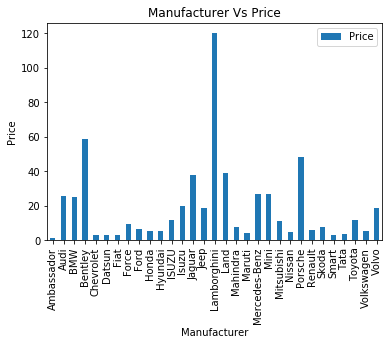

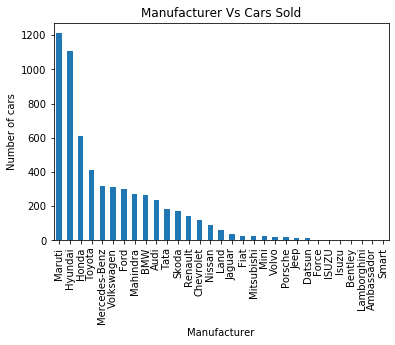

In [11]:
# Column : "Name"

# Sorting cars as per Manufacturer
trainData['Manufacturer'] = trainData.Name.str.split(' ').map(lambda x: x[0])
#encodedCols = pd.get_dummies(trainData['Company'])
#trainData = trainData.join(encodedCols)

# Which companies manufacture more expensive cars?
plt.figure()
Ftrs = trainData[['Manufacturer', 'Price']].groupby(['Manufacturer']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Manufacturer Vs Price")
plt.xlabel("Manufacturer")
plt.ylabel("Price")

# Which company produces how many cars
plt.figure()
Ftrs = trainData.Manufacturer.value_counts()
Ftrs.plot(kind = 'bar')
plt.title("Manufacturer Vs Cars Sold")
plt.xlabel("Manufacturer")
plt.ylabel("Number of cars")

Text(0, 0.5, 'Price')

<Figure size 432x288 with 0 Axes>

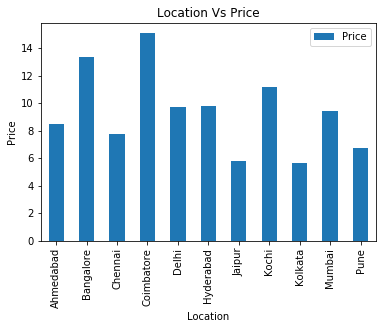

In [14]:
# Column : "Location"

# What are the average price of the cars sold in a particular region/city ??
plt.figure()
Ftrs = trainData[['Location', 'Price']].groupby(['Location']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Location Vs Price")
plt.xlabel("Location")
plt.ylabel("Price")



Text(0, 0.5, 'Price')

<Figure size 432x288 with 0 Axes>

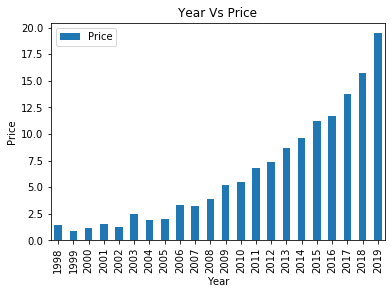

In [16]:
# Column = "Year"

# How does price depreciate with the age of the car ?
plt.figure()
Ftrs = trainData[['Year', 'Price']].groupby(['Year']).mean()
Ftrs.plot(kind= 'bar')
plt.title("Year Vs Price")
plt.xlabel("Year")
plt.ylabel("Price")

# We can see that the price decreases somewhat exponentially with how old the car is.